In [2]:
### Calculate initial rates for each tube

import numpy as np

################################################################################
### parameters to get extinction coeff for NPA at give pH value
################################################################################

### List of Lane Names
lane_name_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
### List of the enzyme concentrations in each lane (nanomolar)
Max_E_conc = 1   ### nanomolar
E_conc_list = [0, 0, 0, 1, 1, 1, 1/2, 1/2, 1/2, 1/4, 1/4, 1/4]  # dilutions

### List of Row Names
row_name_list = ["1", "2", "3", "4", "5", "6", "7", "8"]
### List of the NPA conc in the eight wells of each lane (mM)
S_conc_list = [0.01, 0.02, 0.03, 0.04, 0.06, 0.1, 0.25, 0.5]

### Substrate information
pH = 7.0
e_NPA = 18300  ### extinction coeff for NPA anion
pKa_NPA = 7.15 ### pKa for p-nitrophenol


################################################################################
### Calculated Values from the above lists
################################################################################


Ka = 10 ** -pKa_NPA   ### extinction coeff for NPA at given pH
H = 10 ** -pH
e_NPA = e_NPA * (Ka / (H + Ka))

E_conc_list = np.array(E_conc_list)  * Max_E_conc
E_conc_list = E_conc_list * 1E-9 * 2 ### convert from nM to M

S_conc_list = np.array(S_conc_list)
S_conc_list = S_conc_list * 1E-3       ### convert from mM to M


slope = 0.00708 +/- 0.000361
slope = 0.0136 +/- 0.000581
slope = 0.0202 +/- 0.00055
slope = 0.026 +/- 0.000535
slope = 0.0373 +/- 0.000576
slope = 0.0518 +/- 0.00046
slope = 0.075 +/- 0.000261
slope = 0.0857 +/- 0.000333


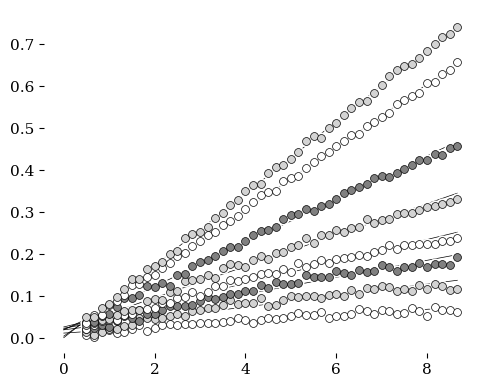

In [45]:
### Plot initial rates for a lane

import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

lane_name = "4"
points_used = 50
def linear_function(x, slope, int):
    return slope*x + int

plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now
plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

data_name = "data1/data"
data_file_extention = ".csv"

plot_file = "plot_initial_rate"
plot_file_extention = ".pdf"

color_list = ['white','lightgray','gray']
lane_name_list = [lane_name]
for lane_name in lane_name_list:
    n = 0
    slope_list = []
    slope_stderr_list = []
    int_list = []
    int_stderr_list = []
    for row_name in row_name_list:
        in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
        df = pd.read_csv(in_file_name)

        x = df["time"][0:points_used] 
        y = df["abs"][0:points_used]

        param,cov = curve_fit(linear_function, x,y)
        slope, int = param

        perr = np.sqrt(np.diag(cov))
        slope_stderr, int_stderr = perr
        print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")
       
        slope_list.append(slope)
        slope_stderr_list.append(slope_stderr)
        int_list.append(int)
        int_stderr_list.append(int_stderr)

        x_fit = np.linspace(0,np.max(x),10)
        ax.plot(x_fit, linear_function(x_fit, slope, int), 
                linestyle = '-', 
                linewidth='0.5', 
                color = 'black', 
                zorder = 0)
        ax.scatter(x, y, 
                marker='o', 
                color=color_list[n%3], 
                edgecolors = 'black',
                linewidths = 0.5, 
                s=32, 
                zorder = 2)
        ax.scatter(x, y, 
                marker='o', 
                color='white', 
                edgecolors = None,
                linewidths = 0.5, 
                s=64, 
                zorder = 1)
        n += 1
    conc_list = S_conc_list

    dict = {"S conc":conc_list,
            "slope":slope_list,
            "slope stderr":slope_stderr_list,
            "int": int_list,
            "int stderr":int_stderr_list}
    data_for_lane = pd.DataFrame(dict)
    
    data_for_lane.to_csv("data1/init_rates_lane_"+lane_name+".csv")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+".pdf")     ### export the plot as this
plt.show()